<a href="https://colab.research.google.com/github/sbb2002/Portfolio/blob/main/.study/Tensorflow/ML_ch3_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


# **Linear regression 에서의 cost 최소화를 위한 tf 구현**

> cost(loss) = sum( ( H(x) - y ) ^ 2 ) / m

를 미분할건데, 편안한 미분이 되기 위해서 

> m --> 2m

> H(x) = W * x ; simplified hypothesis

 으로 바꾼다.

 그리고 cost를 W에 대해 편미분한다.

 > [식 1] d(cost) / dW = x * sum( ( W*x - y ) ) / m

 > [식 2] W:= W - α * d(cost)/dW ; ***cf. := means "return", using *.assign(~)***

 [식 1]을 [식 2]에 대입하여 다음 식을 얻는다.

> W:= W - α * x * sum( ( W*x - y ) ) / m

이제 tensorflow로 구현해보자.



---




In [ ]:
# Define the hypothesis
X = [1,2,3]
Y = [1,2,3]

W = tf.placeholder(tf.float32)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [ ]:
# Launch the graph in a session
sess = tf.Session()

In [ ]:
# Initialize global variables in the graph
sess.run(tf.global_variables_initializer())

In [ ]:
# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):
  feed_W = i * 0.1  # alpha. It is also called "learning rate".
  curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
  W_val.append(curr_W)
  cost_val.append(curr_cost)

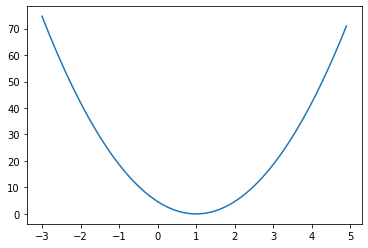

In [ ]:
# Show the cost function
plt.plot(W_val, cost_val)
plt.show()



---

Full code 를 보자.

In [ ]:
x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name='weight')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# The hypothesis
hypothesis = X * W

# cost function
cost = tf.reduce_sum(tf.square(hypothesis - Y))


In [ ]:
# Minimize: Gradient Descent using derivation: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)


In [ ]:
# Launch the graph in a session
sess = tf.Session()

In [ ]:
# Inintialize global variables in the graph 
sess.run(tf.global_variables_initializer())

# Minimize: Gradient Descent using derivation 
for step in range(21):
  sess.run(update, feed_dict={X: x_data, Y: y_data})
  print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))


0 2.1312714 [1.3901713]
1 0.6062285 [1.2080914]
2 0.17243832 [1.1109821]
3 0.04904908 [1.0591904]
4 0.013951714 [1.0315682]
5 0.0039685033 [1.0168364]
6 0.0011288312 [1.0089794]
7 0.00032108603 [1.004789]
8 9.133357e-05 [1.0025542]
9 2.5977442e-05 [1.0013622]
10 7.3884466e-06 [1.0007265]
11 2.10143e-06 [1.0003874]
12 5.97658e-07 [1.0002066]
13 1.6986041e-07 [1.0001101]
14 4.8397126e-08 [1.0000588]
15 1.3738898e-08 [1.0000314]
16 3.8994585e-09 [1.0000167]
17 1.1127241e-09 [1.000009]
18 3.1832315e-10 [1.0000048]
19 8.9542596e-11 [1.0000025]
20 2.3149482e-11 [1.0000013]




---

Minimize는 tf에서 제공하는 메소드로 간결하게 사용할 수도 있다.

밑에서 W=5 인 wrong model의 예시에서 이 간결한 방법을 사용해본다.


In [ ]:
# tf Graph input
X = [1,2,3]
Y = [1,2,3]

# Set wrong model weights
W = tf.Variable(5.0)

# Linear model
hypothesis = X * W

# Cost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))


In [ ]:
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

In [ ]:
# Launch the graph in a session
sess = tf.Session()

In [ ]:
# Initialize global variables in the graph
sess.run(tf.global_variables_initializer())

In [ ]:
for step in range(100):
  print(step, sess.run(W))
  sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


W=5 라는 터무니없는 시작점에서도 결국 cost가 minimize되는 W-->1 까지 잘 내려간다.



---



# **Optional: compute_gradient and apply_gradient**

optimizer가 계산한 미분값을 수동으로 조정할 때 쓰는 코드이다. 다만, 여러번 실행될 때 다음과 같은 이슈가 발생한다.

> TypeError: Fetch argument None has invalid type <class 'NoneType'>

이 이슈의 원인은 아래 사이트에서 참조할 수 있었다.

> https://my-box.tistory.com/7

이슈의 해결책은 gvs를 print하지 않고 run하면 된다.

In [ ]:
X = [1,2,3]
Y = [1,2,3]

W = tf.Variable(5.)

# The hypothesis
hypothesis = X * W

# Manual gradient
gradient = tf.reduce_mean((W*X - Y) * X) * 2

# cost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

### 여기까진 동일 ###

In [ ]:
# Get gradients
gvs = optimizer.compute_gradients(cost)

# Issue: gvs의 튜플 1열에서 None이 있어서 run할 경우 에러발생.
for i in range(len(gvs)):
  print("element-{} of gvs:".format(i+1), gvs[i])
print(len(gvs))
print(type(gvs))

element-1 of gvs: (None, <tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>)
element-2 of gvs: (None, <tf.Variable 'weight_1:0' shape=(1,) dtype=float32_ref>)
element-3 of gvs: (None, <tf.Variable 'weight_2:0' shape=(1,) dtype=float32_ref>)
element-4 of gvs: (None, <tf.Variable 'Variable:0' shape=() dtype=float32_ref>)
element-5 of gvs: (None, <tf.Variable 'weight_3:0' shape=(1,) dtype=float32_ref>)
element-6 of gvs: (None, <tf.Variable 'Variable_1:0' shape=() dtype=float32_ref>)
element-7 of gvs: (None, <tf.Variable 'weight_4:0' shape=(1,) dtype=float32_ref>)
element-8 of gvs: (None, <tf.Variable 'weight_5:0' shape=(1,) dtype=float32_ref>)
element-9 of gvs: (None, <tf.Variable 'weight_6:0' shape=(1,) dtype=float32_ref>)
element-10 of gvs: (None, <tf.Variable 'Variable_2:0' shape=() dtype=float32_ref>)
element-11 of gvs: (None, <tf.Variable 'Variable_3:0' shape=() dtype=float32_ref>)
element-12 of gvs: (None, <tf.Variable 'Variable_4:0' shape=() dtype=float32_ref>)
element-13 of gvs

In [ ]:
### gvs값을 알맞게 수정한 후... ###

In [ ]:
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

In [ ]:
# Launch the graph in a session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
  print(step, sess.run([gradient, W]))
  sess.run(apply_gradients)

0 [37.333332, 5.0]
1 [2.4888866, 1.2666664]
2 [0.1659259, 1.0177778]
3 [0.011061668, 1.0011852]
4 [0.00073742867, 1.000079]
5 [4.895528e-05, 1.0000052]
6 [3.0994415e-06, 1.0000004]
7 [0.0, 1.0]
8 [0.0, 1.0]
9 [0.0, 1.0]
10 [0.0, 1.0]
11 [0.0, 1.0]
12 [0.0, 1.0]
13 [0.0, 1.0]
14 [0.0, 1.0]
15 [0.0, 1.0]
16 [0.0, 1.0]
17 [0.0, 1.0]
18 [0.0, 1.0]
19 [0.0, 1.0]
20 [0.0, 1.0]
21 [0.0, 1.0]
22 [0.0, 1.0]
23 [0.0, 1.0]
24 [0.0, 1.0]
25 [0.0, 1.0]
26 [0.0, 1.0]
27 [0.0, 1.0]
28 [0.0, 1.0]
29 [0.0, 1.0]
30 [0.0, 1.0]
31 [0.0, 1.0]
32 [0.0, 1.0]
33 [0.0, 1.0]
34 [0.0, 1.0]
35 [0.0, 1.0]
36 [0.0, 1.0]
37 [0.0, 1.0]
38 [0.0, 1.0]
39 [0.0, 1.0]
40 [0.0, 1.0]
41 [0.0, 1.0]
42 [0.0, 1.0]
43 [0.0, 1.0]
44 [0.0, 1.0]
45 [0.0, 1.0]
46 [0.0, 1.0]
47 [0.0, 1.0]
48 [0.0, 1.0]
49 [0.0, 1.0]
50 [0.0, 1.0]
51 [0.0, 1.0]
52 [0.0, 1.0]
53 [0.0, 1.0]
54 [0.0, 1.0]
55 [0.0, 1.0]
56 [0.0, 1.0]
57 [0.0, 1.0]
58 [0.0, 1.0]
59 [0.0, 1.0]
60 [0.0, 1.0]
61 [0.0, 1.0]
62 [0.0, 1.0]
63 [0.0, 1.0]
64 [0.0, 1.0]
65 [0.0, 1